In [1]:
# === Шаг 1: Определение параметров модели ===

# --- Параметры нейрона (на основе биологических данных) ---
V_rest = -70.0  # мВ (Потенциал покоя мембраны, к которому она стремится)
V_thresh = -55.0 # мВ (Порога, при достижении которого нейрон "стреляет")
V_reset = -75.0  # мВ (Потенциал, к которому мембрана сбрасывается после спайка)
R = 10.0         # МОм (Сопротивление мембраны. Чем оно выше, тем медленнее "утечка")
C = 1.0          # нФ (Емкость мембраны. Чем она выше, тем медленнее меняется потенциал)

# --- Параметры стимуляции и симуляции ---
I_input = 1.6    # нА (Величина постоянного тока, который мы подаем на нейрон)
T = 100.0        # мс (Общее время, которое мы хотим симулировать)
dt = 0.1         # мс (Шаг по времени. Чем он меньше, тем точнее симуляция)

print("Параметры модели определены.")

Параметры модели определены.


In [2]:
# === Шаг 2: Инициализация симуляции ===

# Рассчитываем общее количество шагов в нашей симуляции
# (делим общее время на длительность одного шага).
# int() используется, чтобы получить целое число.
time_steps = int(T / dt)

# Задаем начальное состояние нейрона.
# В самом начале (при t=0) потенциал нейрона равен потенциалу покоя.
V = V_rest

# Создаем "контейнеры" для записи результатов.
# Сюда мы будем записывать значение потенциала на каждом шаге,
# сразу добавляем начальное значение.
voltage_trace = [V]

# Этот список пока пуст. Сюда мы будем добавлять моменты времени,
# когда произошли спайки.
spike_times = []


print(f"Симуляция будет длиться {time_steps} шагов.")
print(f"Начальный потенциал V = {V} мВ.")

Симуляция будет длиться 1000 шагов.
Начальный потенциал V = -70.0 мВ.


In [3]:
# === Шаг 3: Цикл симуляции и вывод результатов ===

# Запускаем цикл, который будет работать `time_steps` раз.
# На каждом шаге переменная 'step' будет последовательно равна 0, 1, 2, ..., 999.
for step in range(time_steps):
    # Рассчитываем изменение потенциала (dV) за один шаг dt по формуле LIF.
    # Это и есть наша "интеграция" и "утечка".
    dV = ((V_rest - V) / R + I_input) / C * dt

    # Обновляем значение потенциала, прибавляя к нему рассчитанное изменение.
    V = V + dV

    # Проверяем, достиг ли потенциал порога срабатывания. Это "срабатывание" (fire).
    if V >= V_thresh:
        # Да, достиг! Произошел спайк (потенциал действия).
        # 1. Сбрасываем потенциал до значения V_reset.
        V = V_reset

        # 2. Записываем время, когда это произошло.
        # Текущее время = (номер шага + 1) * длительность шага.
        current_time = (step + 1) * dt
        spike_times.append(current_time)

    # Записываем новое значение потенциала в нашу историю (в любом случае,
    # было срабатывание или нет). Это нужно, чтобы потом построить график.
    voltage_trace.append(V)

# --- Вывод результатов ---
# Цикл закончился, теперь посмотрим, что получилось.

print("Симуляция завершена.")
print(f"Обнаружено спайков: {len(spike_times)}") # len() - считает кол-во элементов в списке
print(f"Времена спайков (мс): {spike_times}")

Симуляция завершена.
Обнаружено спайков: 3
Времена спайков (мс): [27.6, 57.900000000000006, 88.2]


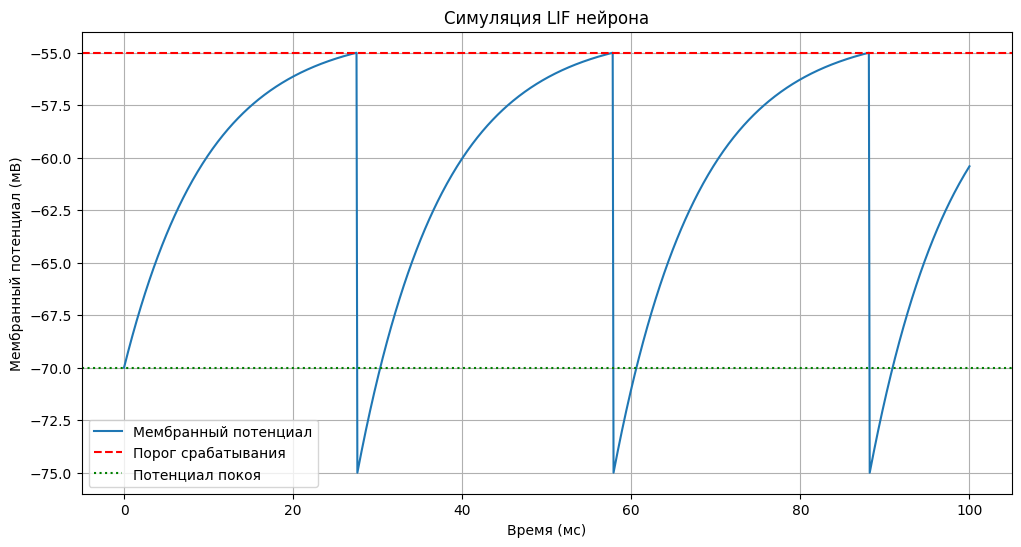

In [5]:
# === Шаг 4: Визуализация результатов с помощью Matplotlib ===

# Сначала нужно импортировать библиотеку.
# Мы импортируем ее под коротким псевдонимом 'plt', так принято в сообществе.
import matplotlib.pyplot as plt
import numpy as np # NumPy - еще одна мощная библиотека для вычислений, нам она нужна для создания оси времени.

# --- Подготовка данных для графика ---
# Создаем ось времени: список моментов времени от 0 до T с шагом dt
time_points = np.arange(0, T + dt, dt)

# --- Создание графика ---
# Задаем размер рисунка, чтобы он был не слишком маленьким
plt.figure(figsize=(12, 6))

# Строим основной график: по оси Y - значения потенциала, по оси X - время
# 'label' - это название линии для легенды графика
plt.plot(time_points, voltage_trace, label='Мембранный потенциал')

# Добавляем горизонтальные линии для наглядности
plt.axhline(y=V_thresh, color='r', linestyle='--', label='Порог срабатывания')
plt.axhline(y=V_rest, color='g', linestyle=':', label='Потенциал покоя')

# Добавляем подписи осей и заголовок
plt.title('Симуляция LIF нейрона')
plt.xlabel('Время (мс)')
plt.ylabel('Мембранный потенциал (мВ)')

# Включаем легенду (расшифровку линий)
plt.legend()

# Включаем сетку для удобства
plt.grid(True)

# Показываем готовый график
plt.show()

In [6]:
# === Спринт №3, Шаг 1: Создание "чертежа" нейрона (Класс) ===

class Neuron:
    # __init__ - это специальный метод, "конструктор".
    # Он вызывается автоматически КАЖДЫЙ РАЗ, когда мы создаем новый объект-нейрон.
    # 'self' - это обязательная ссылка на сам создаваемый объект (на конкретный "дом").
    # Это позволяет каждому нейрону иметь свой собственный, независимый набор переменных.
    def __init__(self):
        print("Создан новый нейрон!")
        # --- Параметры, уникальные для каждого нейрона ---
        self.V_rest = -70.0   # мВ
        self.V_thresh = -55.0 # мВ
        self.V_reset = -75.0  # мВ
        self.R = 10.0         # МОм
        self.C = 1.0          # нФ

        # --- Текущее состояние нейрона ---
        # self.V означает "потенциал ЭТОГО КОНКРЕТНОГО нейрона"
        self.V = self.V_rest  # Каждый новый нейрон начинает с потенциала покоя


# === Проверяем наш чертеж в действии ===

# 1. Создаем наш первый нейрон (объект) по чертежу Neuron.
# n1 - это "экземпляр" класса Neuron. В этот момент вызывается метод __init__.
print("Создаем первый нейрон...")
n1 = Neuron()

# Мы можем получить доступ к "внутренним" переменным объекта через точку.
print(f"Потенциал нейрона n1: {n1.V} мВ")
print(f"Порог срабатывания для n1: {n1.V_thresh} мВ")
print("-" * 20) # разделитель для наглядности

# 2. Создаем второй, полностью независимый нейрон.
# Для него тоже вызывается свой собственный __init__.
print("Создаем второй нейрон...")
n2 = Neuron()
print(f"Потенциал нейрона n2: {n2.V} мВ")

# 3. Мы можем даже изменить параметр у одного из нейронов, и это не затронет другой.
print("Меняем порог у нейрона n2...")
n2.V_thresh = -50.0
print(f"Новый порог n1: {n1.V_thresh} мВ") # остался прежним
print(f"Новый порог n2: {n2.V_thresh} мВ") # изменился

Создаем первый нейрон...
Создан новый нейрон!
Потенциал нейрона n1: -70.0 мВ
Порог срабатывания для n1: -55.0 мВ
--------------------
Создаем второй нейрон...
Создан новый нейрон!
Потенциал нейрона n2: -70.0 мВ
Меняем порог у нейрона n2...
Новый порог n1: -55.0 мВ
Новый порог n2: -50.0 мВ


In [7]:
# === Спринт №3, Шаг 2: Добавляем "Действия" в наш чертеж (Методы) ===

class Neuron:
    # Конструктор __init__ остается таким же
    def __init__(self):
        # Параметры нейрона
        self.V_rest = -70.0
        self.V_thresh = -55.0
        self.V_reset = -75.0
        self.R = 10.0
        self.C = 1.0
        # Состояние нейрона
        self.V = self.V_rest

    # Добавляем наш первый метод-действие!
    # Он принимает 'self', чтобы знать, с каким именно объектом работать,
    # а также параметры 'dt' (шаг времени) и 'I' (входной ток).
    def update(self, dt, I):
        # Формула точно такая же, как в нашем старом скрипте,
        # но теперь мы используем переменные, принадлежащие объекту: self.V, self.R и т.д.
        dV = ((self.V_rest - self.V) / self.R + I) / self.C * dt
        self.V = self.V + dV

        # Логика срабатывания теперь тоже часть метода
        if self.V >= self.V_thresh:
            self.V = self.V_reset # Сбрасываем потенциал ЭТОГО нейрона
            return True # Сигнализируем "Да, был спайк!"

        return False # Сигнализируем "Нет, спайка не было"

# --- Проверяем новый метод в действии ---

# 1. Снова создаем нейрон
neuron_A = Neuron()
print(f"Начальный потенциал: {neuron_A.V:.2f} мВ")

# 2. Подаем на него СИЛЬНЫЙ ток в течение небольшого времени (30 мс)
print("\nПодаем сильный ток (I=2.0 нА)...")
for step in range(300): # 300 шагов по 0.1 мс = 30 мс
    # На каждом шаге вызываем метод update для нашего объекта neuron_A
    # и проверяем, вернул ли он True (то есть, был ли спайк)
    has_spiked = neuron_A.update(dt=0.1, I=2.0)

    if has_spiked:
        time_of_spike = (step + 1) * 0.1
        print(f"--- СПАЙК! на {time_of_spike:.1f} мс (Потенциал сброшен до {neuron_A.V:.2f} мВ) ---")

print(f"\nКонечный потенциал: {neuron_A.V:.2f} мВ")

Начальный потенциал: -70.00 мВ

Подаем сильный ток (I=2.0 нА)...
--- СПАЙК! на 13.8 мс (Потенциал сброшен до -75.00 мВ) ---
--- СПАЙК! на 29.9 мс (Потенциал сброшен до -75.00 мВ) ---

Конечный потенциал: -74.75 мВ


Начинаем симуляцию двух нейронов...
!!! n1 спайкнул на 27.6 мс -> передаем ток на n2 !!!
!!! n1 спайкнул на 57.9 мс -> передаем ток на n2 !!!
!!! n1 спайкнул на 88.2 мс -> передаем ток на n2 !!!
!!! n1 спайкнул на 118.5 мс -> передаем ток на n2 !!!
!!! n1 спайкнул на 148.8 мс -> передаем ток на n2 !!!
!!! n1 спайкнул на 179.1 мс -> передаем ток на n2 !!!

Симуляция завершена.


NameError: name 'V_thresh' is not defined

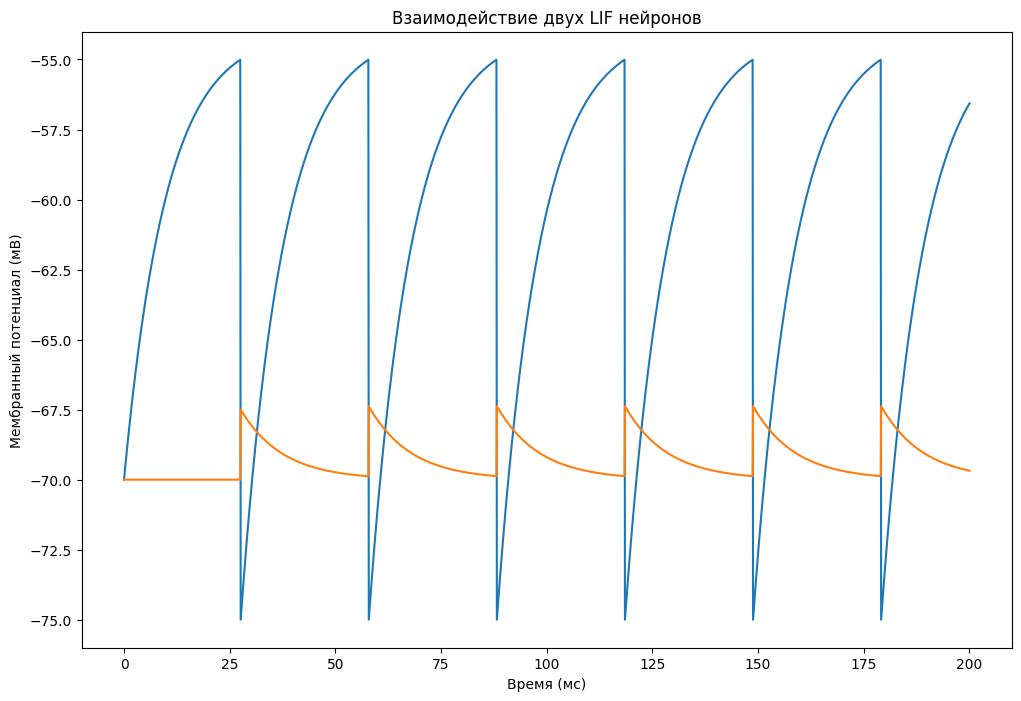

In [10]:
 === Спринт №3, Шаг 3: Взаимодействие двух нейронов ===

# Сначала снова определим наш класс Neuron, чтобы ячейка была самодостаточной
class Neuron:
    def __init__(self):
        self.V_rest = -70.0; self.V_thresh = -55.0; self.V_reset = -75.0
        self.R = 10.0; self.C = 1.0; self.V = self.V_rest
    def update(self, dt, I):
        dV = ((self.V_rest - self.V) / self.R + I) / self.C * dt
        self.V = self.V + dV
        if self.V >= self.V_thresh:
            self.V = self.V_reset
            return True
        return False
# --- Настройка эксперимента ---
n1 = Neuron() # Нейрон-стимулятор
n2 = Neuron() # Нейрон-приемник

# Параметры симуляции
T = 200.0  # Увеличим время симуляции до 200 мс
dt = 0.1
time_steps = int(T / dt)

I_input_n1 = 1.6   # Постоянный ток на первый нейрон, чтобы он спайковал
I_synaptic = 25.0  # Сила "пинка" от n1 к n2 (величина синаптического тока)

# Хранилища для графиков
voltage_trace_n1 = [n1.V]
voltage_trace_n2 = [n2.V]

# --- Основной цикл симуляции ---
print("Начинаем симуляцию двух нейронов...")
for step in range(time_steps):
    # 1. Обновляем первый нейрон. Он получает постоянный внешний ток.
    n1_spiked = n1.update(dt, I_input_n1)

    # 2. Определяем ток для второго нейрона. По умолчанию он равен нулю.
    current_for_n2 = 0
    # Но если первый нейрон ТОЛЬКО ЧТО сгенерировал спайк...
    if n1_spiked:
        print(f"!!! n1 спайкнул на {(step+1)*dt:.1f} мс -> передаем ток на n2 !!!")
        # ...мы подаем на второй нейрон сильный, но короткий синаптический ток.
        current_for_n2 = I_synaptic

    # 3. Обновляем второй нейрон с учетом возможного синаптического тока.
    n2_spiked = n2.update(dt, current_for_n2)
    if n2_spiked:
        print(f"*** УРА! n2 тоже спайкнул на {(step+1)*dt:.1f} мс! ***")

    # 4. Записываем результаты для обоих нейронов
    voltage_trace_n1.append(n1.V)
    voltage_trace_n2.append(n2.V)

print("\nСимуляция завершена.")

# === Визуализация результатов взаимодействия ===
import matplotlib.pyplot as plt
import numpy as np

# Создаем ось времени
time_points = np.arange(0, T + dt, dt)

# Создаем график
plt.figure(figsize=(12, 8))
plt.plot(time_points, voltage_trace_n1, label='Нейрон 1 (стимулятор)')
plt.plot(time_points, voltage_trace_n2, label='Нейрон 2 (приемник)', linestyle='-')
plt.title('Взаимодействие двух LIF нейронов')
plt.xlabel('Время (мс)')
plt.ylabel('Мембранный потенциал (мВ)')
plt.axhline(y=V_thresh, color='r', linestyle='--', label='Порог срабатывания')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# === Спринт №4, Шаг 1: Знакомство с ipywidgets ===
from ipywidgets import interact
import ipywidgets as widgets

# 1. Определим простую функцию, которая принимает один аргумент x
def my_simple_function(x):
    # Она просто будет выводить на экран квадрат этого числа
    print(f"Квадрат числа {x} равен {x * x}")


# 2. А теперь - "магия". Передаем нашу функцию в декоратор @interact.
# Мы также "подсказываем", что для аргумента 'x' мы хотим видеть ползунок
# для целых чисел от 0 до 10.
@interact(x=widgets.IntSlider(min=0, max=10, step=1, value=7))
def interactive_f(x):
    print(f"Квадрат числа {x} равен {x * x}")

interactive(children=(IntSlider(value=7, description='x', max=10), Output()), _dom_classes=('widget-interact',…

In [1]:
# === Спринт №4, Шаг 2: Интерактивный дашборд для симуляции ===

# Сначала импортируем все, что нам понадобится
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets

# Помещаем наш класс Neuron сюда же, чтобы ячейка была полностью самодостаточной
from MYneuron import Neuron

# А теперь "оборачиваем" ВСЮ нашу симуляцию в одну большую функцию.
# В качестве аргументов она принимает те параметры, которыми мы хотим управлять.
# Декоратор @interact свяжет ползунки с этими аргументами.
@interact(
    I_input_n1=widgets.FloatSlider(min=0.0, max=3.0, step=0.1, value=1.6, description='Ток на нейрон 1:'),
    I_synaptic=widgets.FloatSlider(min=0.0, max=50.0, step=1.0, value=25.0, description='Сила синапса:')
)
def run_interactive_simulation(I_input_n1, I_synaptic):
    # --- Внутри функции мы повторяем всю нашу логику ---

    # 1. Настройка эксперимента
    n1 = Neuron(); n2 = Neuron()
    T = 200.0; dt = 0.1
    time_steps = int(T / dt)
    voltage_trace_n1 = [n1.V]; voltage_trace_n2 = [n2.V]

    # 2. Основной цикл симуляции
    for step in range(time_steps):
        n1_spiked = n1.update(dt, I_input_n1) # Используем значение с ползунка
        current_for_n2 = I_synaptic if n1_spiked else 0 # Используем значение с ползунка
        n2_spiked = n2.update(dt, current_for_n2)
        voltage_trace_n1.append(n1.V)
        voltage_trace_n2.append(n2.V)

    # 3. Визуализация результатов
    time_points = np.arange(0, T + dt, dt)
    plt.figure(figsize=(12, 6))
    plt.plot(time_points, voltage_trace_n1, label='Нейрон 1 (стимулятор)')
    plt.plot(time_points, voltage_trace_n2, label='Нейрон 2 (приемник)')
    plt.title('Интерактивная симуляция двух нейронов')
    plt.xlabel('Время (мс)'); plt.ylabel('Мембранный потенциал (мВ)')
    plt.axhline(y=-55.0, color='r', linestyle='--', label='Порог срабатывания')
    plt.legend(); plt.grid(True)
    # Важно: зададим одинаковый диапазон для оси Y, чтобы график не "прыгал"
    plt.ylim(-80, -50)
    plt.show()

interactive(children=(FloatSlider(value=1.6, description='Ток на нейрон 1:', max=3.0), FloatSlider(value=25.0,…